In [94]:
# Import libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [81]:
# Extract data (keep unaltered)
data_orig = pd.read_csv('../../ETL/Load/stockData.csv', header=(0), sep=';')
data = data_orig.copy()

In [82]:
data_orig

,TICKER,DATE,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS
0,ABEV3,2014-07-01,21.706832,2.906275,0.258062,0.634963,0.029252,5.601715,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75000,0.376079,0
1,ABEV3,2014-08-01,22.676506,2.906275,0.258062,0.634963,0.028001,5.851952,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75000,0.278858,0
2,ABEV3,2014-09-01,22.219375,2.906275,0.258062,0.634963,0.028577,5.733983,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75000,0.327730,0
3,ABEV3,2014-10-01,22.718062,2.906275,0.258062,0.634963,0.027950,5.862676,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75000,0.286358,0
4,ABEV3,2014-11-01,23.216752,2.906275,0.258062,0.634963,0.027349,5.991369,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75000,0.211723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11358,YDUQ3,2023-08-01,-102.086973,10.561267,-0.018731,-0.677386,0.006635,1.912161,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.501691,0
11359,YDUQ3,2023-09-01,-99.581156,10.561267,-0.018731,-0.677386,0.006802,1.865226,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.529218,0
11360,YDUQ3,2023-10-01,-88.856255,10.561267,-0.018731,-0.677386,0.007623,1.664341,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.390872,0
11361,YDUQ3,2023-11-01,-100.683712,10.561267,-0.018731,-0.677386,0.006728,1.885877,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.531334,0


In [83]:
# Describe original Data
data_orig.describe()

,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS
count,11363.000000,11363.000000,11363.000000,11363.000000,11363.000000,11363.000000,1.136300e+04,1.136300e+04,1.136300e+04,1.136300e+04,11363.000000,11363.000000,11363.000000
mean,-531.551791,33.890718,-0.025214,0.338965,4.741799,51.896740,1.533774e+10,1.978991e+10,3.818294e+09,inf,3.918511,0.163647,0.097333
std,15684.407655,508.396423,3.095612,2.592203,78.270801,1018.558948,2.748858e+10,6.773164e+10,2.313760e+10,NaN,91.344843,0.630312,0.296424
min,-765054.927367,-664.507625,-63.574215,-66.250000,-0.000000,-1249.308423,6.943000e+06,0.000000e+00,4.469333e+04,7.070553e-02,-111.585170,-0.995833,0.000000
25%,2.251269,5.016680,0.036619,0.000000,0.003078,0.682970,1.824915e+09,1.206523e+09,2.530056e+08,1.164050e+00,0.170000,-0.176193,0.000000
50%,8.823358,9.895760,0.120799,0.282966,0.022017,1.575433,5.417423e+09,3.935138e+09,7.231214e+08,1.629700e+00,0.920250,0.069011,0.000000
75%,23.070468,17.793117,0.197393,0.594902,0.058745,3.689210,1.594072e+10,1.333942e+10,1.821185e+09,2.419938e+00,2.175100,0.362940,0.000000
max,12635.786682,14885.774638,11.746541,45.098061,2196.206875,38484.339615,2.149780e+11,7.532630e+11,4.176953e+11,inf,2770.000000,10.778047,1.000000


In [73]:
# Function to remove outliers using std
def remove_outliers_std(data, column, factor = 3):
    data_std = data[column].std()
    data_mean = data[column].mean()
    lower_bound = data_mean - factor * data_std
    upper_bound = data_mean + factor * data_std
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [74]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column, factor = 1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [75]:
# List of features and the class column
features = data_orig.columns.tolist()[2:-2]
binary_class = data_orig.columns.tolist()[-1]

data_cleaned = data_orig.copy()

# Replace inf values by very large number
data_cleaned.replace(np.inf, 1e20, inplace=True)

# Clean outliers from data
method = 'iqr' # std or iqr
factor = 9

if method == 'std':
    for feature in features:
        data_cleaned = remove_outliers_std(data_cleaned, feature)
elif method == 'iqr':
    for feature in features:
        data_cleaned = remove_outliers_iqr(data_cleaned, feature, factor)
    
# Describe original Data
data_cleaned.describe()

,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS
count,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8.919000e+03,8.919000e+03,8.919000e+03,8919.000000,8919.000000,8919.000000,8919.000000
mean,16.582435,12.989648,0.122198,0.378030,0.046131,2.801878,1.128822e+10,9.826177e+09,1.477259e+09,1.991991,1.311585,0.188945,0.097993
std,33.911304,12.395500,0.235740,0.617125,0.069356,3.489603,1.727343e+10,1.467931e+10,2.162997e+09,1.385476,2.909676,0.630781,0.297322
min,-183.154662,-45.325658,-1.296702,-3.785075,-0.000000,-12.734168,6.943000e+06,0.000000e+00,1.176395e+07,0.070706,-14.397300,-0.995833,0.000000
25%,3.946369,5.671784,0.050651,0.021948,0.005588,0.767693,1.868424e+09,1.279121e+09,2.812250e+08,1.201993,0.344370,-0.146254,0.000000
50%,11.168648,9.972984,0.123176,0.299398,0.022746,1.633963,5.173901e+09,4.034495e+09,6.971256e+08,1.650449,1.080000,0.082034,0.000000
75%,23.969016,17.098325,0.197393,0.587045,0.056583,3.397220,1.324252e+10,1.245898e+10,1.637548e+09,2.371410,2.140000,0.368727,0.000000
max,208.431179,82.780883,1.289349,5.366712,0.558543,26.609409,1.268052e+11,1.126668e+11,1.513876e+10,11.800608,18.377440,10.778047,1.000000


In [76]:
data_cleaned[data_cleaned['CLASS']==1].describe()

,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,8.740000e+02,8.740000e+02,8.740000e+02,874.000000,874.000000,874.000000,874.0
mean,14.403048,16.779901,0.095882,0.323138,0.061252,2.021273,1.057177e+10,1.079660e+10,1.121055e+09,1.979514,1.360213,1.543236,1.0
std,35.910958,15.844663,0.273128,0.865427,0.089587,3.313215,1.458041e+10,1.707165e+10,1.785805e+09,1.825223,4.055180,1.013455,0.0
min,-104.934139,-2.245112,-1.284227,-3.785075,-0.000000,-4.834012,1.074800e+07,0.000000e+00,1.215976e+07,0.106487,-9.152700,0.801434,1.0
25%,1.070159,6.949837,0.017459,0.000000,0.002010,0.337391,1.207780e+09,6.716940e+08,1.665737e+08,1.108886,0.130000,0.988484,1.0
50%,6.095732,10.871374,0.079730,0.202270,0.026345,0.925639,3.928204e+09,3.651545e+09,5.406511e+08,1.538422,0.700000,1.252316,1.0
75%,17.076887,21.248289,0.170393,0.550424,0.079329,1.938051,1.279785e+10,1.477183e+10,1.322044e+09,2.176133,2.186000,1.628524,1.0
max,207.773722,82.780883,1.077140,5.366712,0.546771,24.636389,8.392596e+10,1.126668e+11,1.469339e+10,11.022951,18.377440,10.778047,1.0


In [77]:
data_cleaned[data_cleaned['CLASS']==0].describe()

,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS
count,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8.045000e+03,8.045000e+03,8.045000e+03,8045.000000,8045.000000,8045.000000,8045.0
mean,16.819201,12.577879,0.125057,0.383994,0.044488,2.886682,1.136606e+10,9.720752e+09,1.515957e+09,1.993346,1.306302,0.041816,0.0
std,33.680776,11.889738,0.231154,0.583589,0.066591,3.497952,1.754014e+10,1.439277e+10,2.196703e+09,1.329110,2.757012,0.329724,0.0
min,-183.154662,-45.325658,-1.296702,-3.785075,-0.000000,-12.734168,6.943000e+06,0.000000e+00,1.176395e+07,0.070706,-14.397300,-0.995833,0.0
25%,4.364614,5.489298,0.053795,0.052706,0.005832,0.822358,1.927671e+09,1.351003e+09,2.940400e+08,1.212179,0.365680,-0.175348,0.0
50%,11.729415,9.714450,0.127724,0.305796,0.022617,1.736698,5.252000e+09,4.039000e+09,7.065989e+08,1.668396,1.095000,0.040945,0.0
75%,24.400037,16.864175,0.200604,0.591838,0.054829,3.498898,1.324252e+10,1.225402e+10,1.658162e+09,2.376552,2.118910,0.264706,0.0
max,208.431179,82.780883,1.289349,5.366712,0.558543,26.609409,1.268052e+11,1.126668e+11,1.513876e+10,11.800608,18.377440,0.798991,0.0


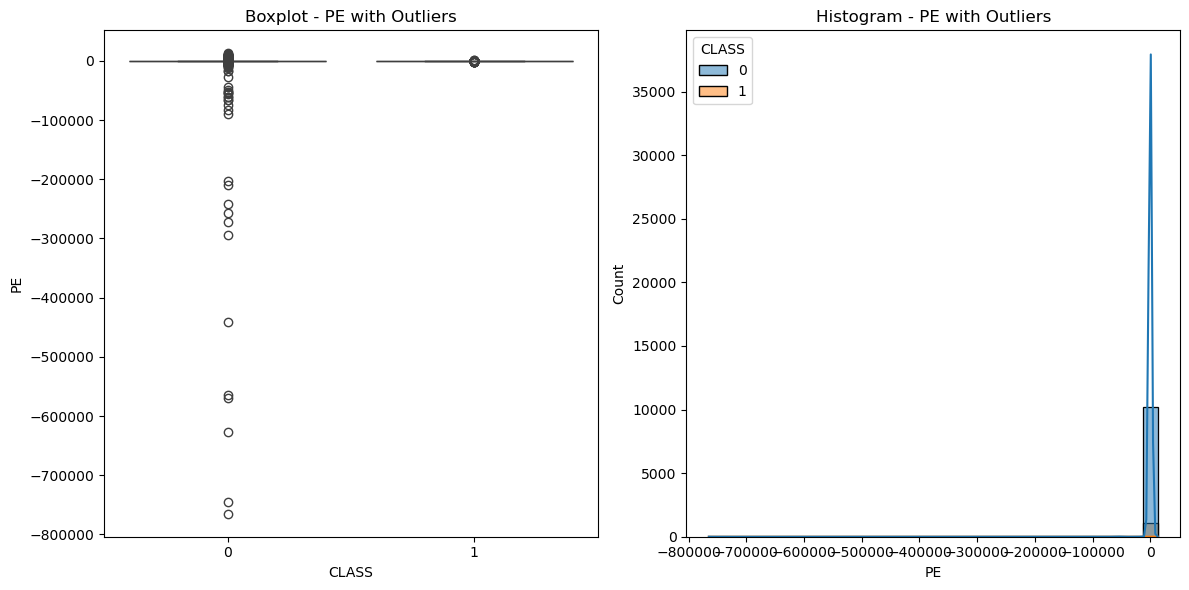

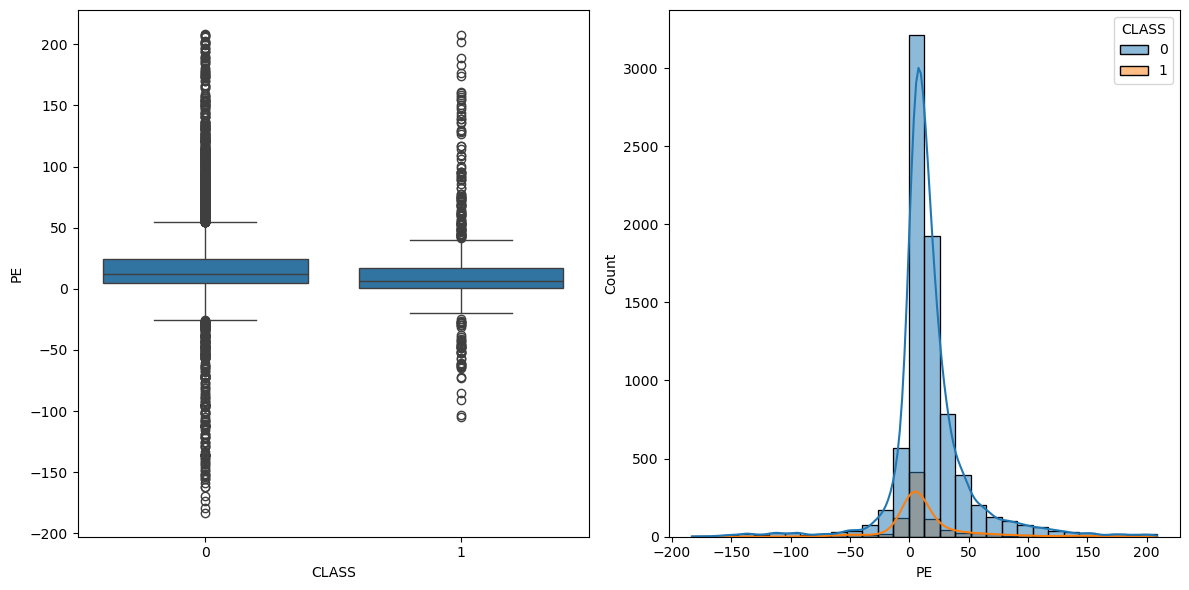

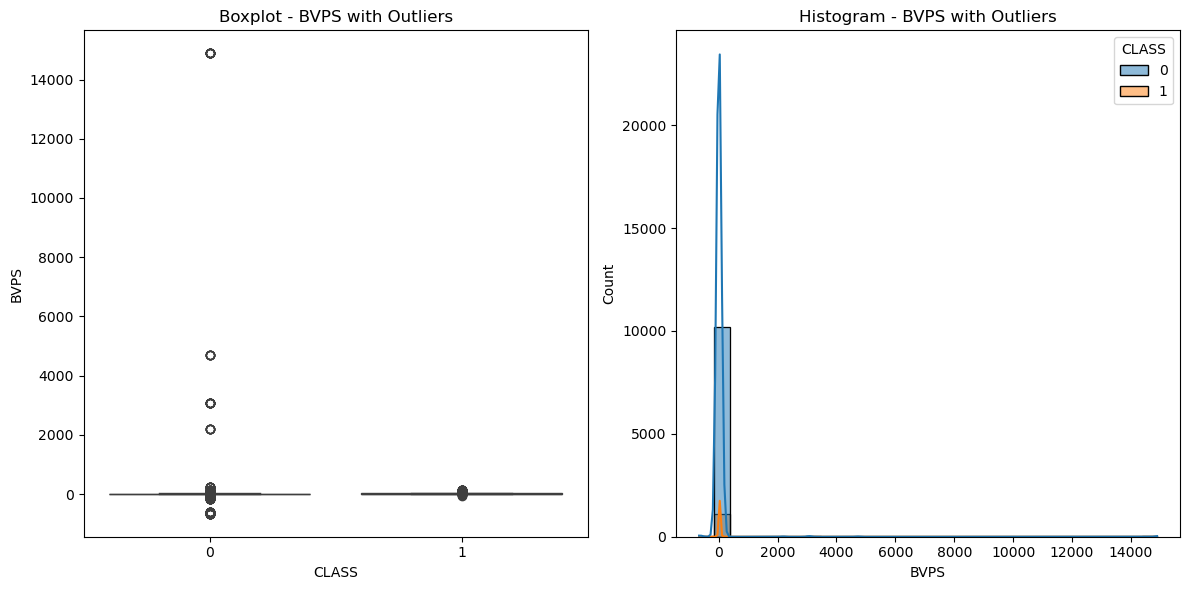

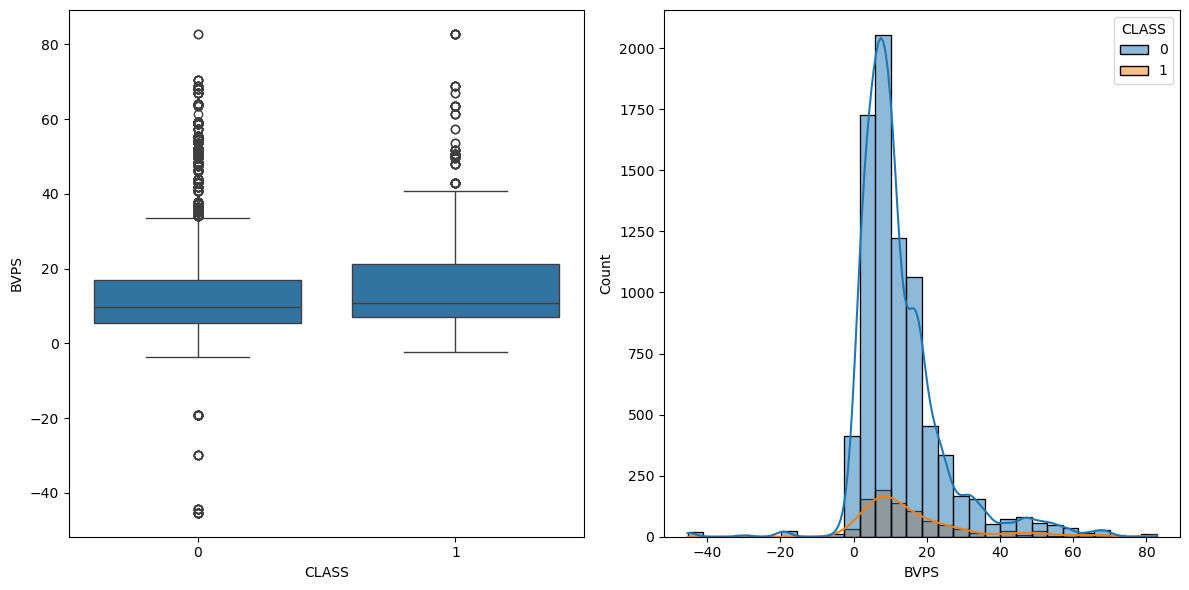

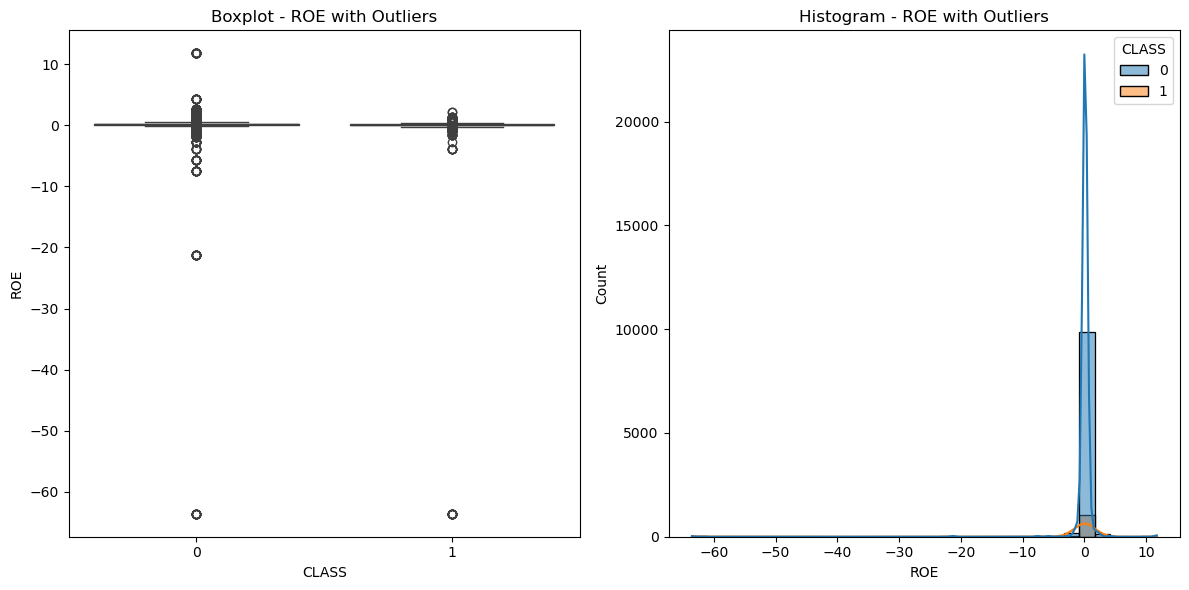

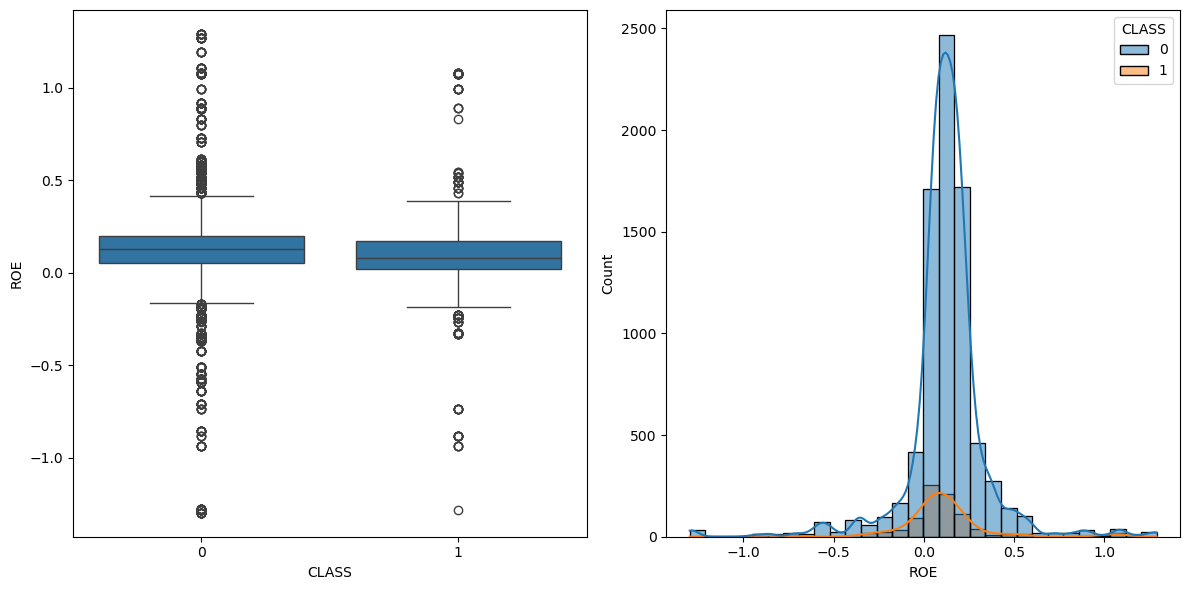

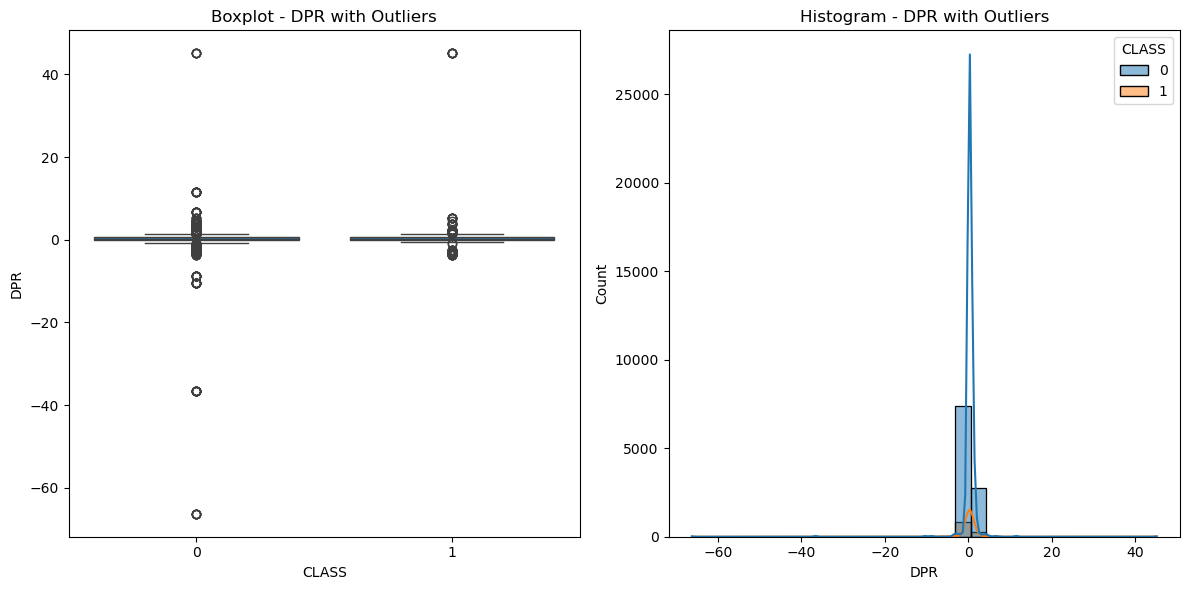

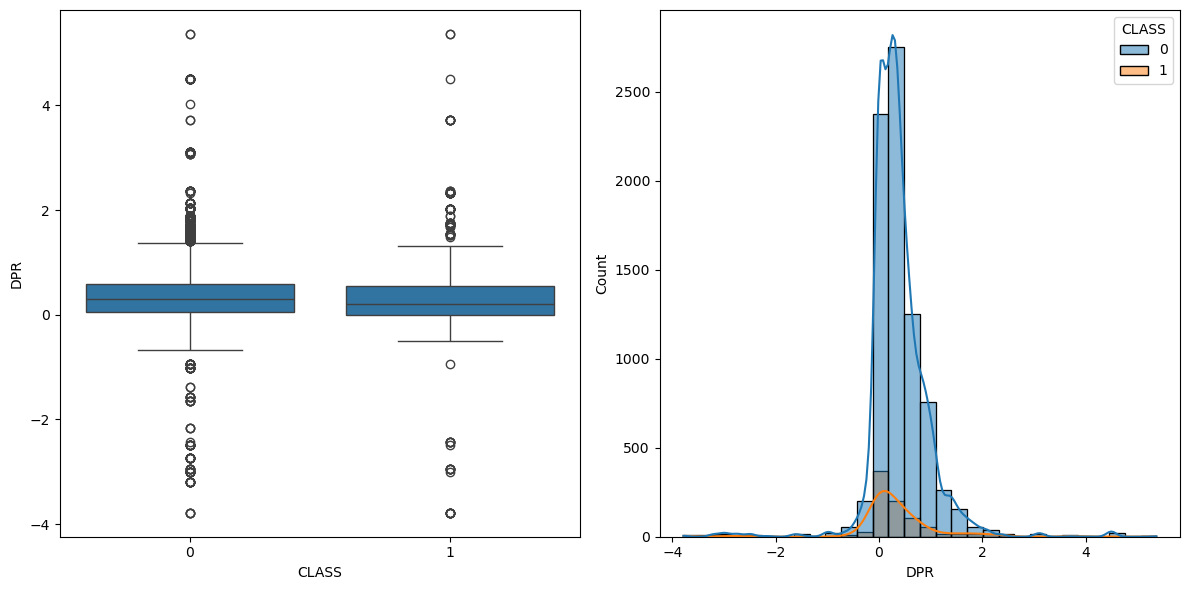

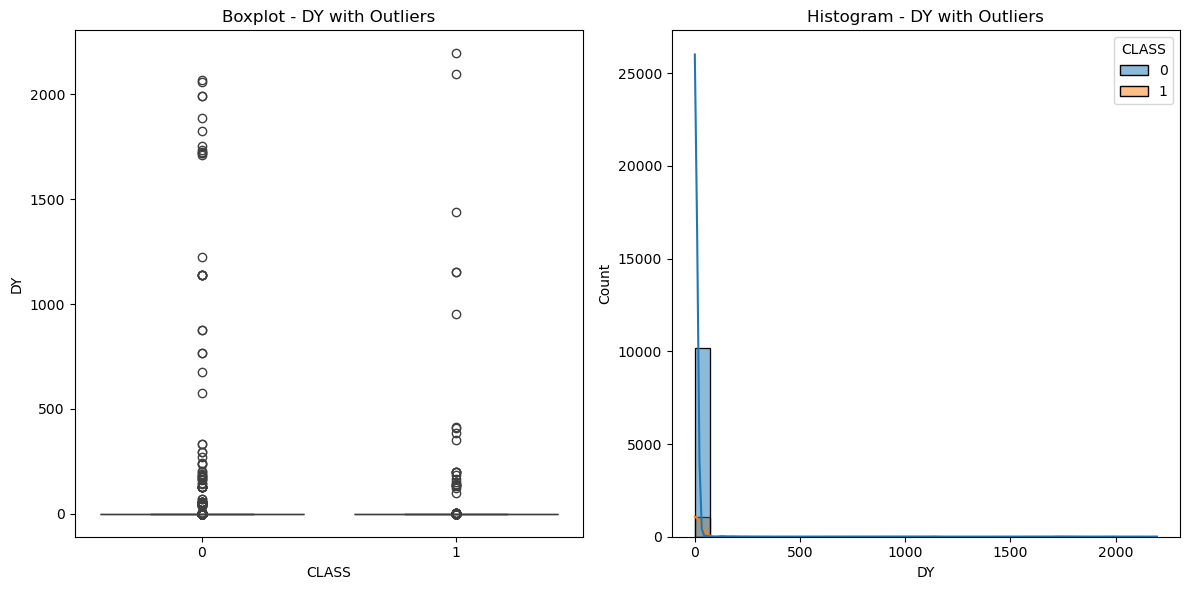

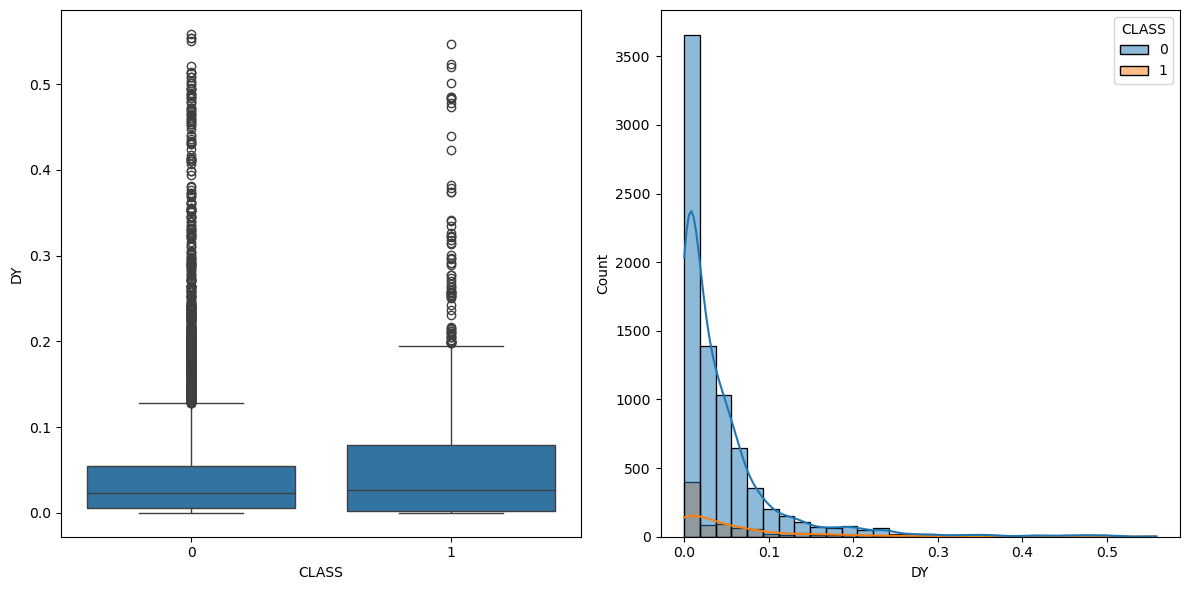

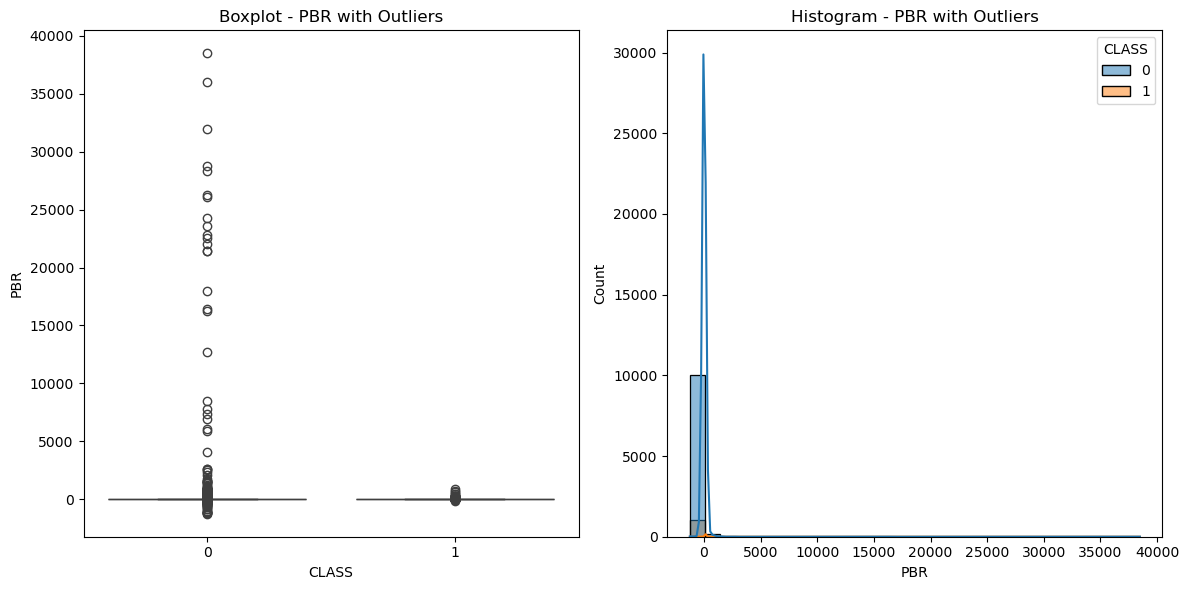

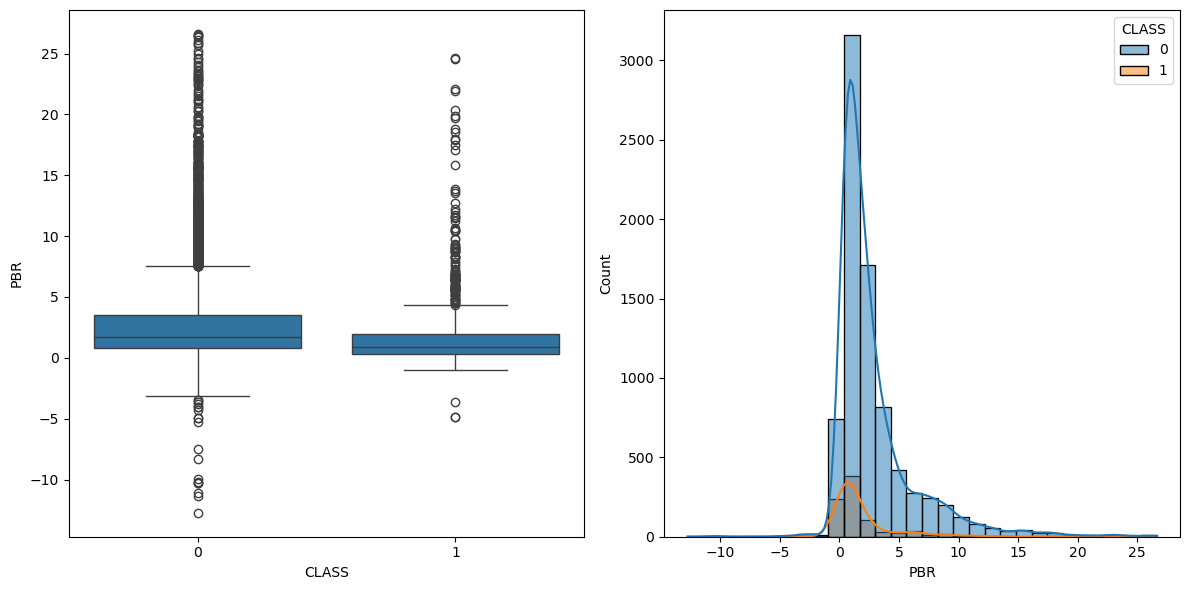

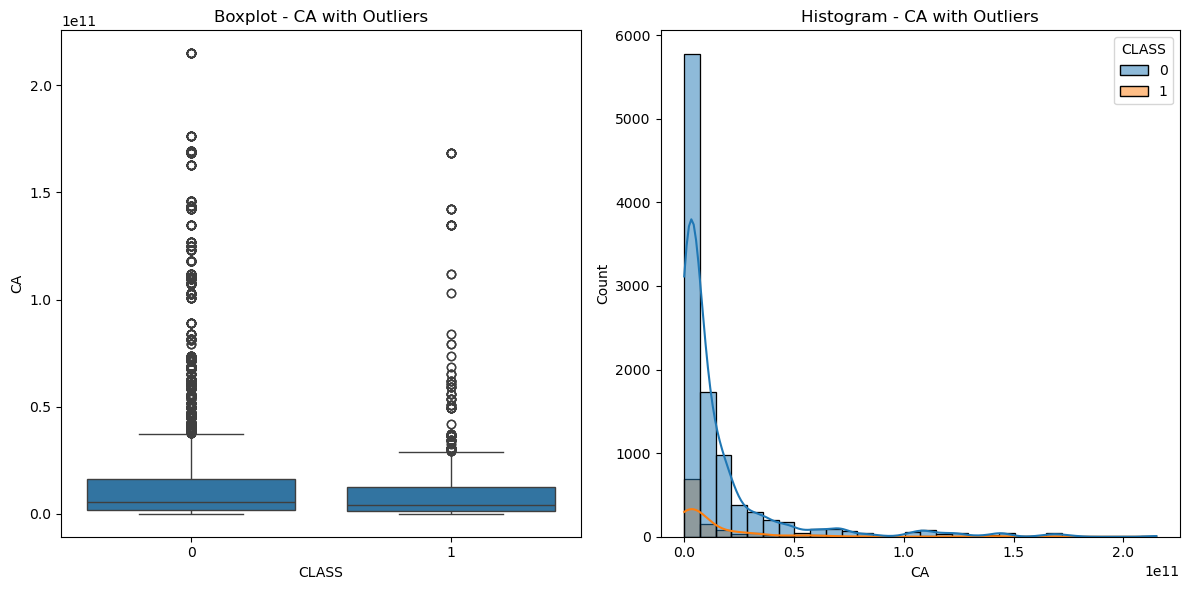

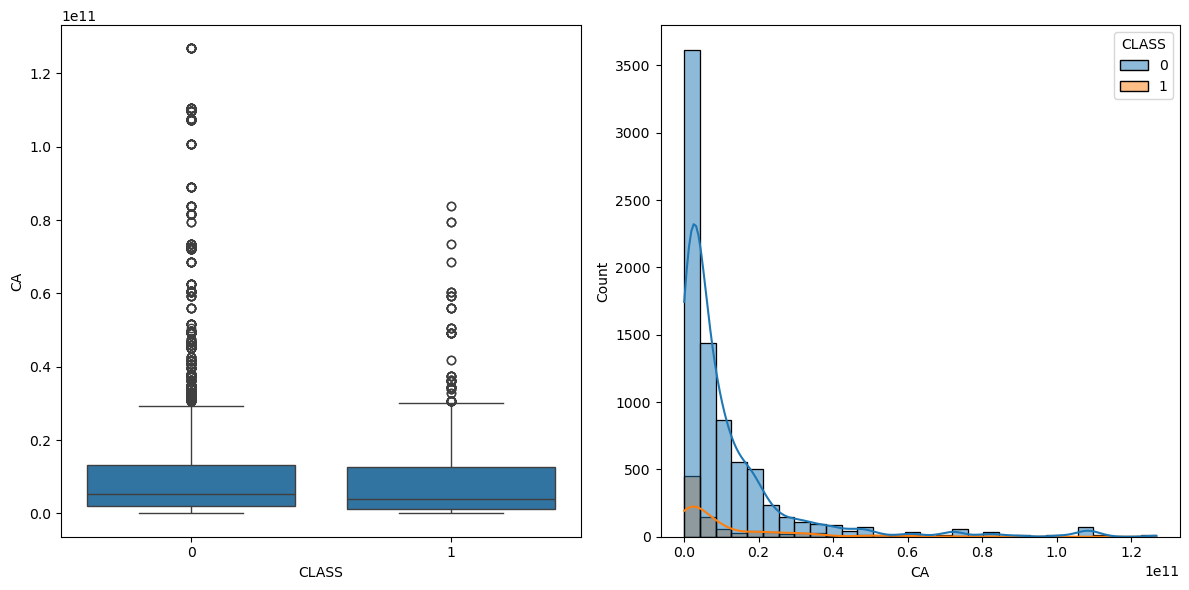

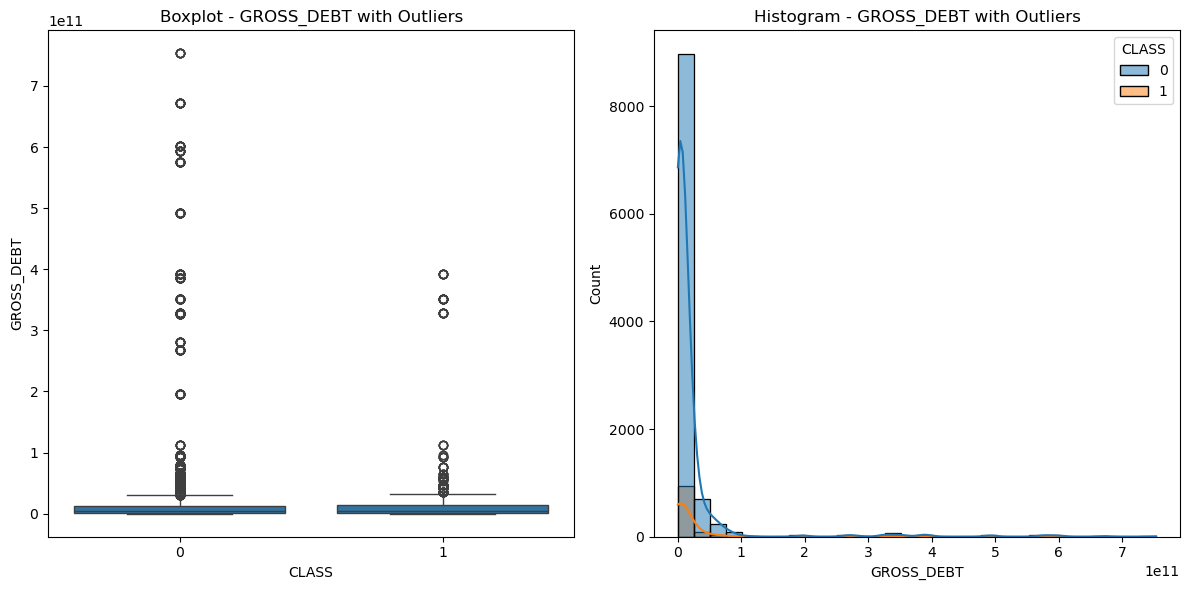

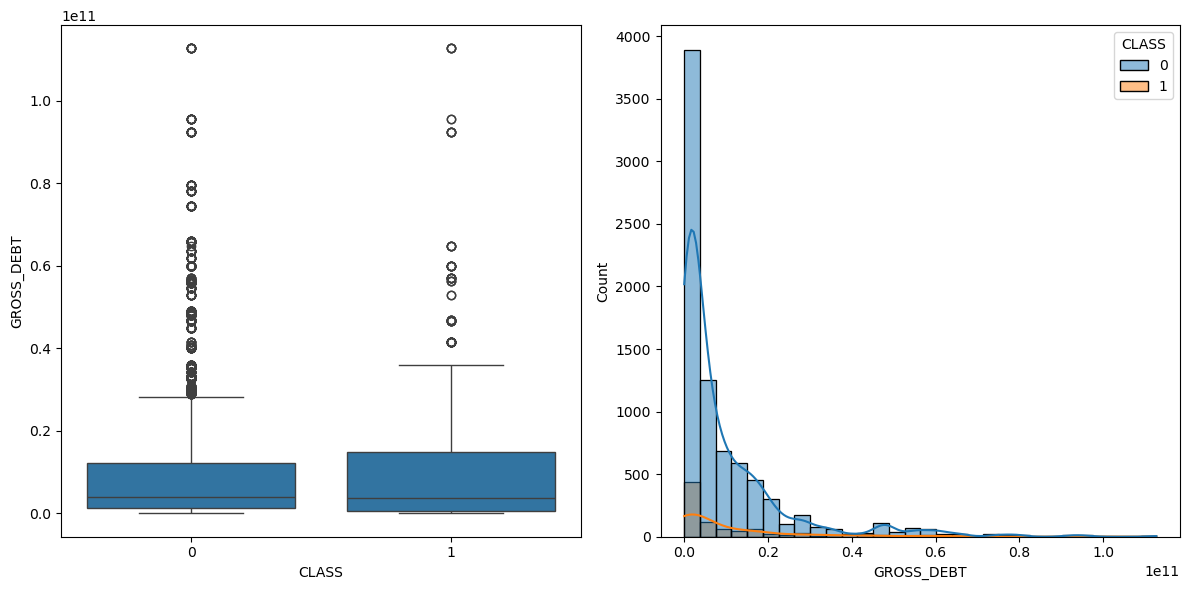

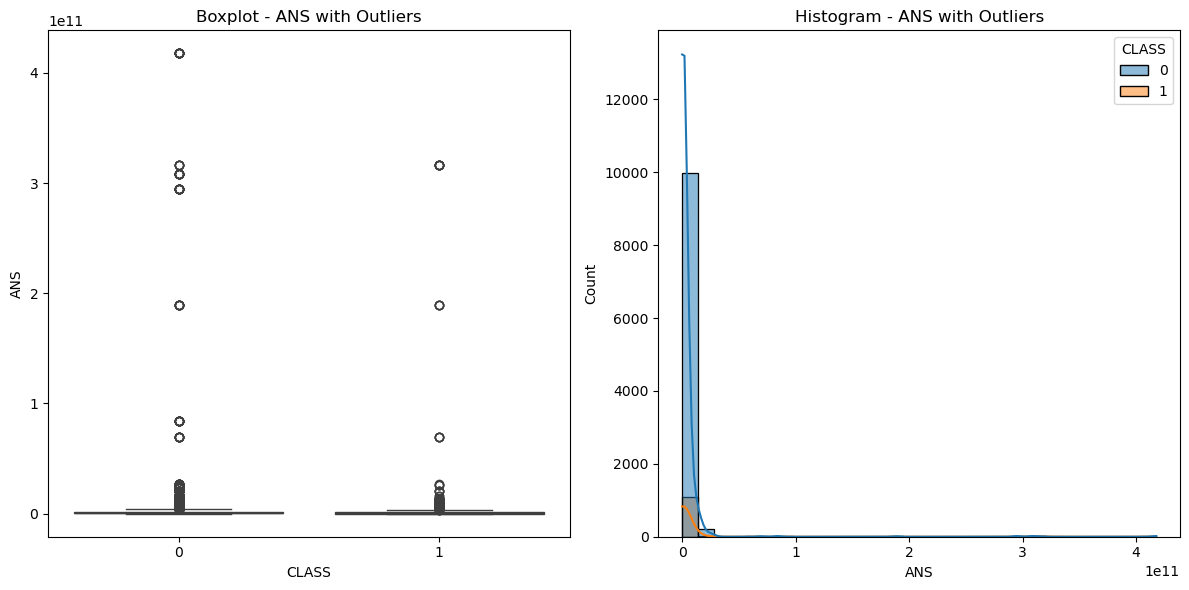

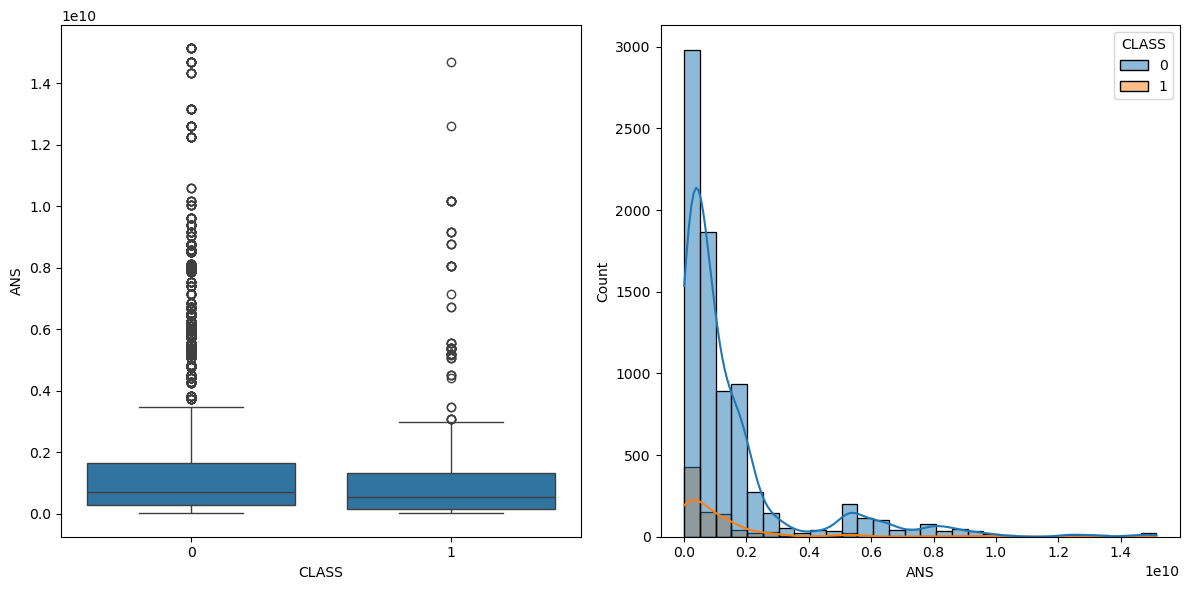

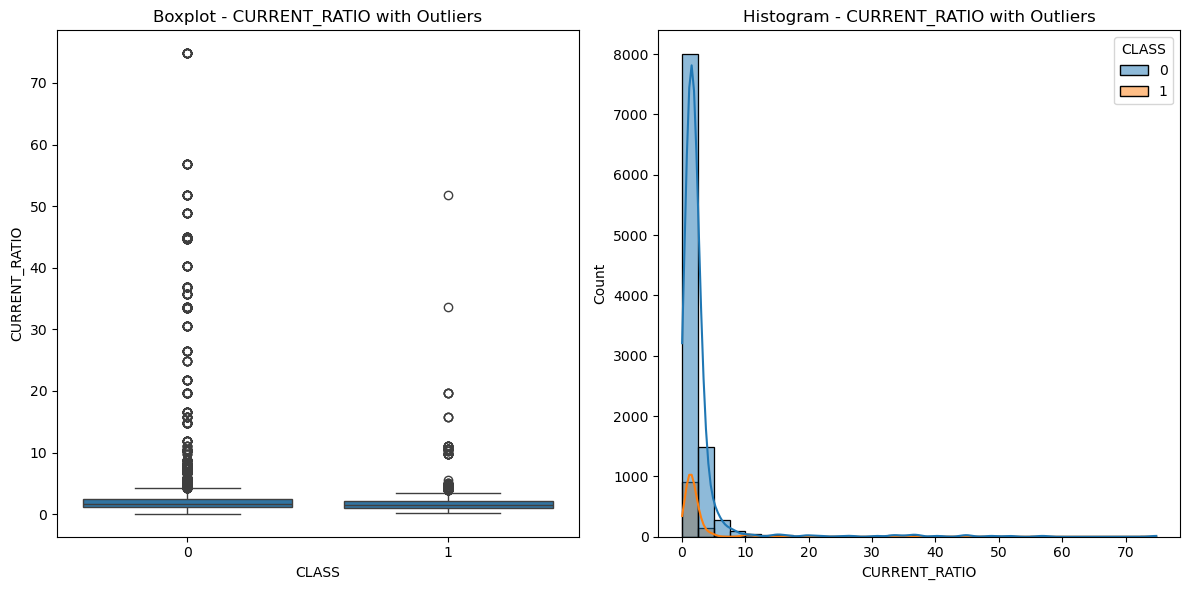

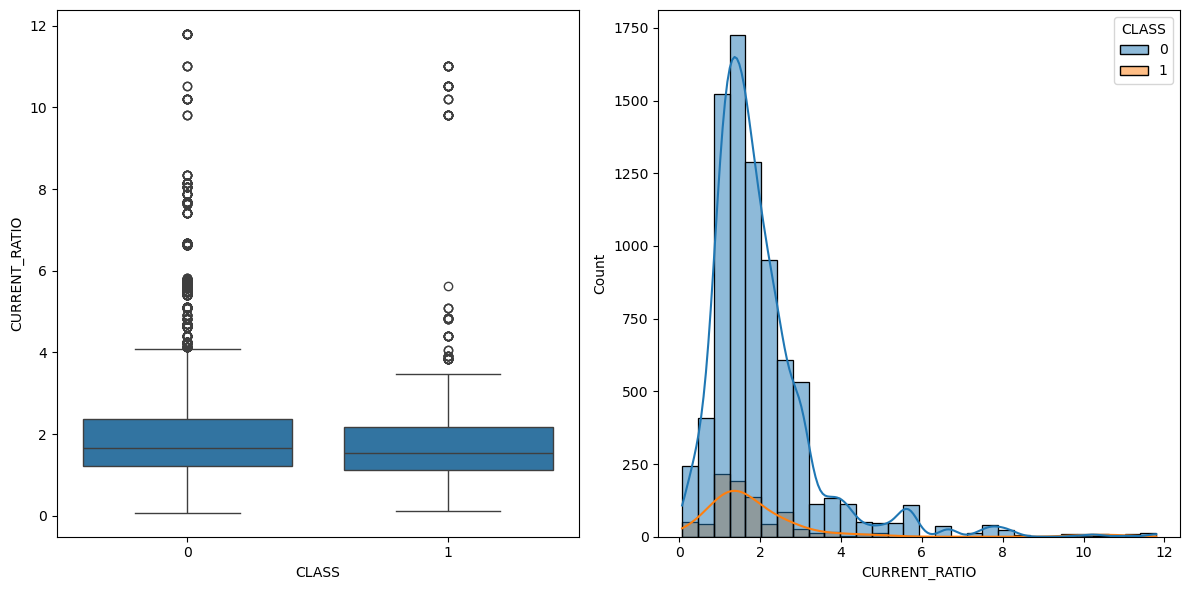

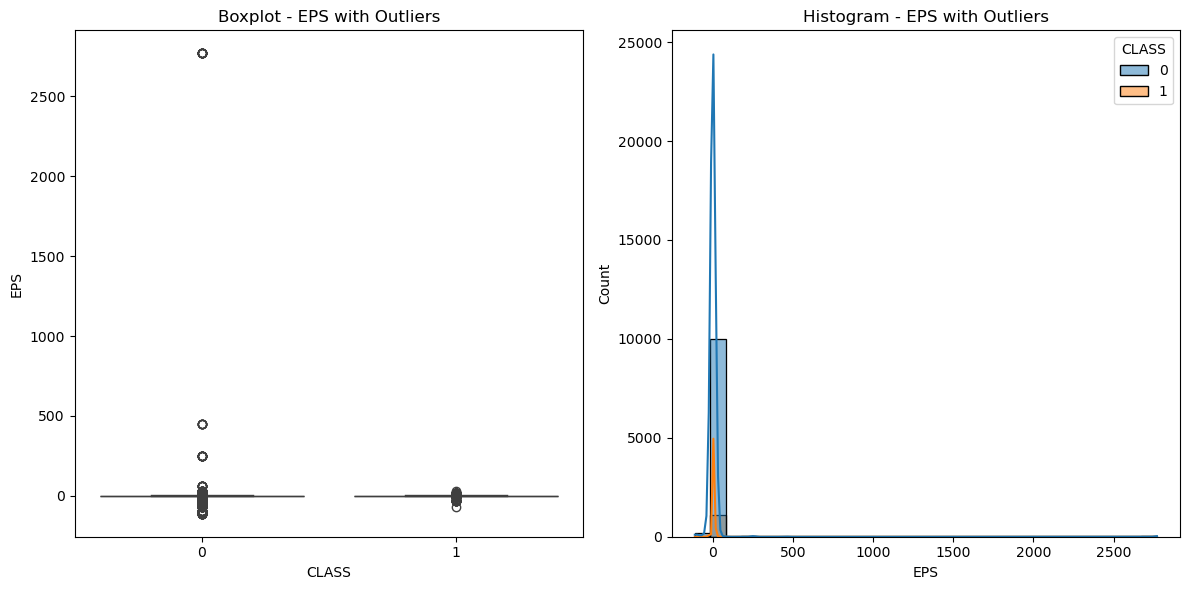

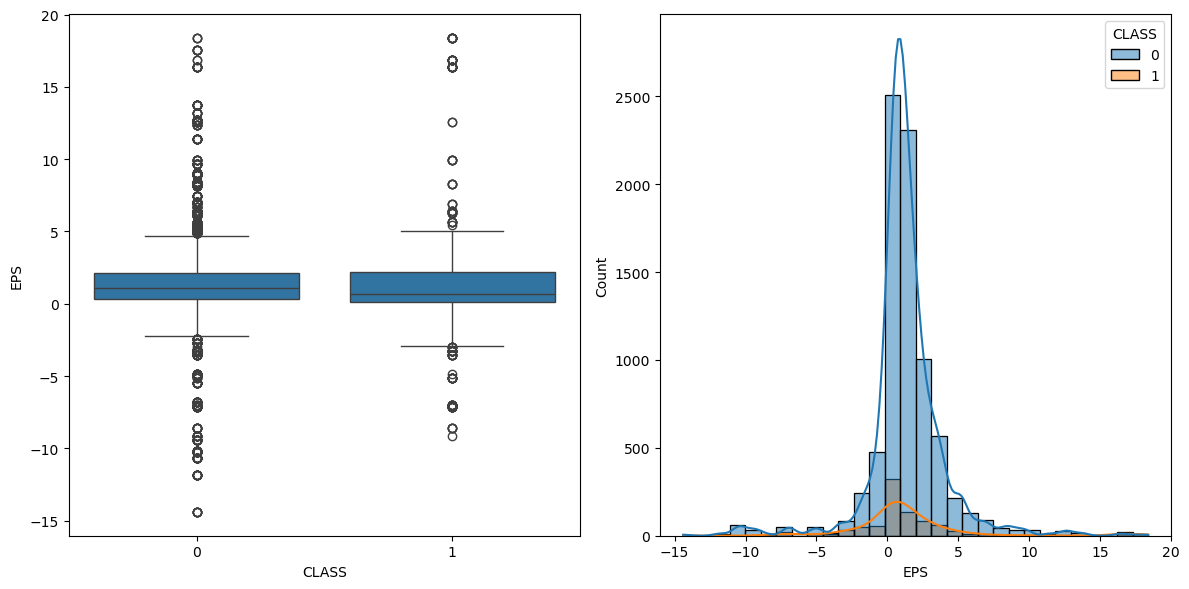

In [97]:
# Boxplots and histograms with and without outliers for all the features

# Directory to save the graphs
output_dir = "graphs"

# Plotting boxplots and histograms
for feature in features:
    # Original data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data_orig, x=binary_class, y=feature)
    plt.title(f'Boxplot - {feature} with Outliers')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=data_orig, x=feature, hue=binary_class, kde=True, bins=30)
    plt.title(f'Histogram - {feature} with Outliers')
    plt.tight_layout()
    plt.show()
    
    # Data without outliers
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data_cleaned, x=binary_class, y=feature)
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=data_cleaned, x=feature, hue=binary_class, kde=True, bins=30)
    plt.tight_layout()

    # Save the figure for cleaned data
    plt.savefig(os.path.join(output_dir, f'{feature}_without_outliers.png'))
    
    plt.show()

    

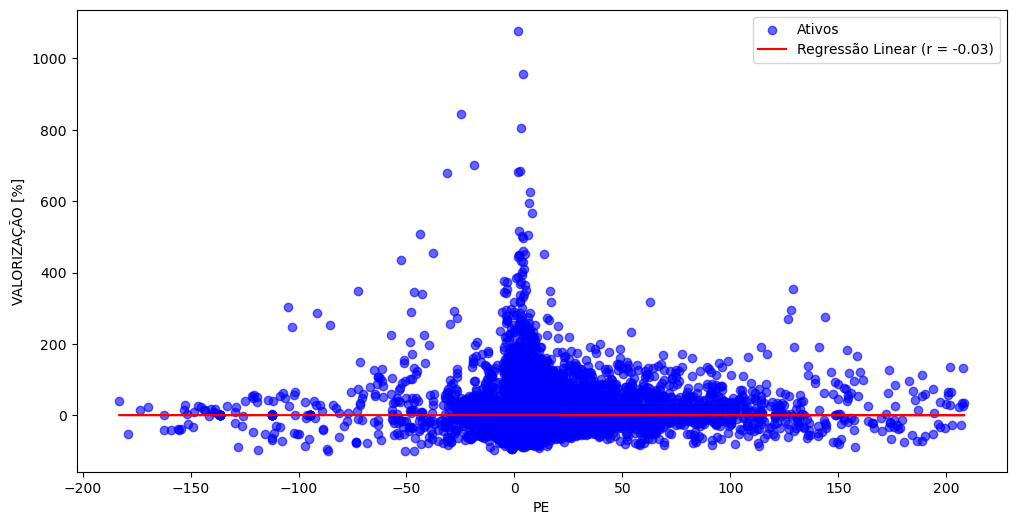

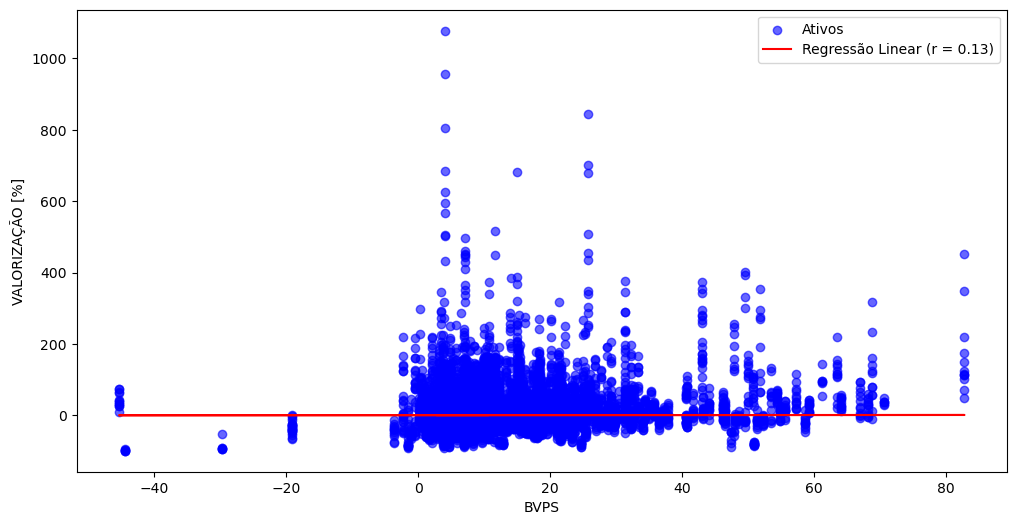

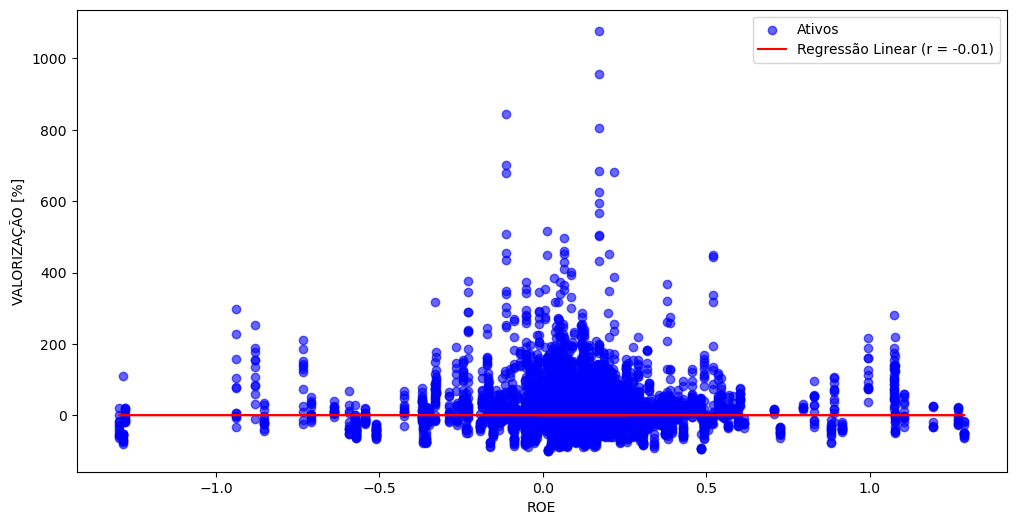

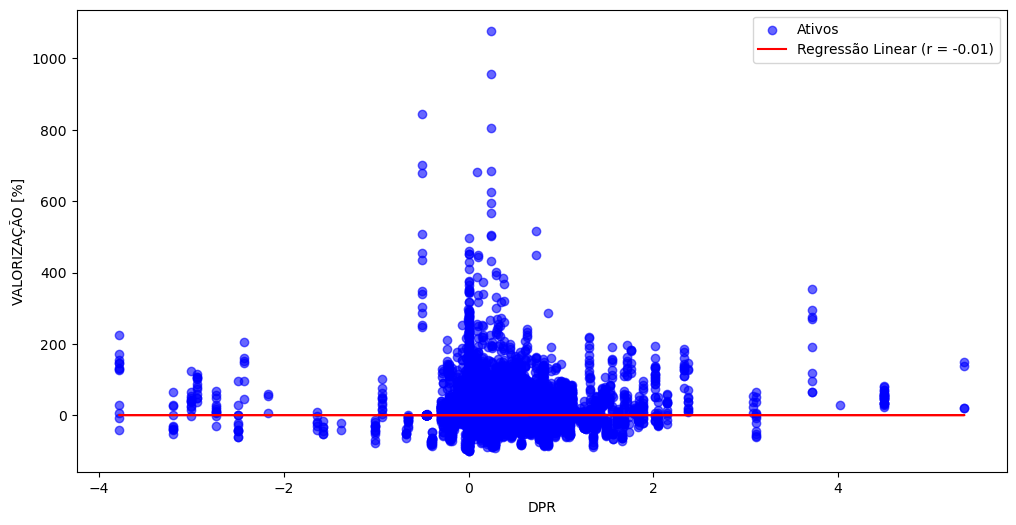

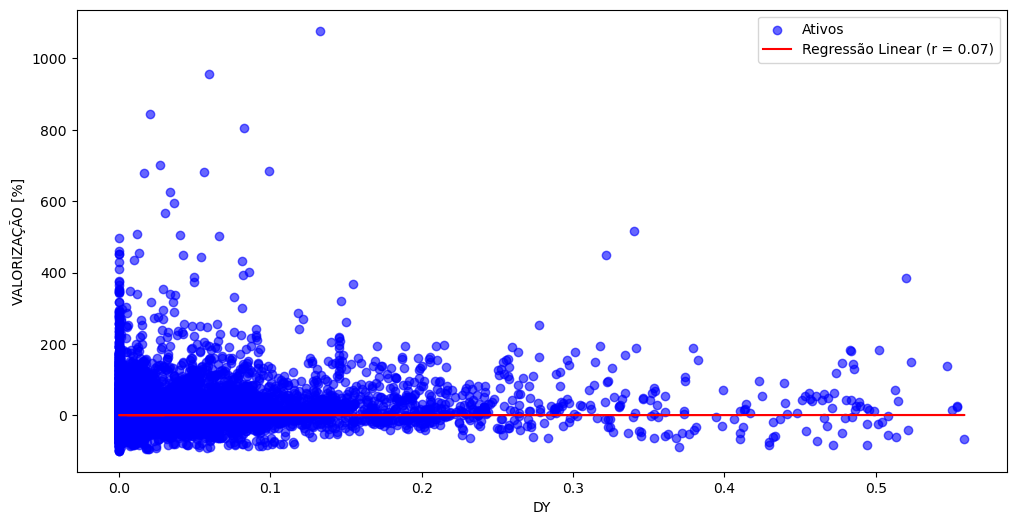

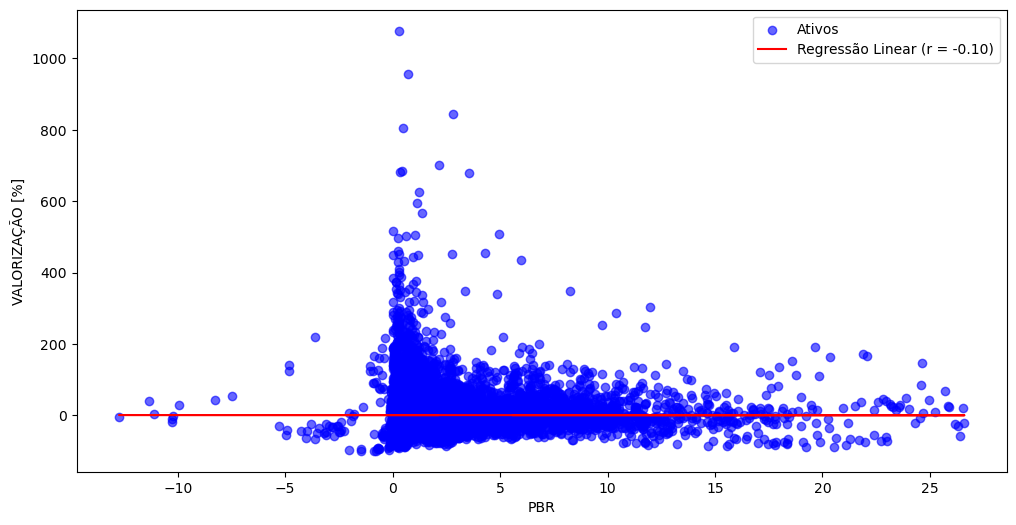

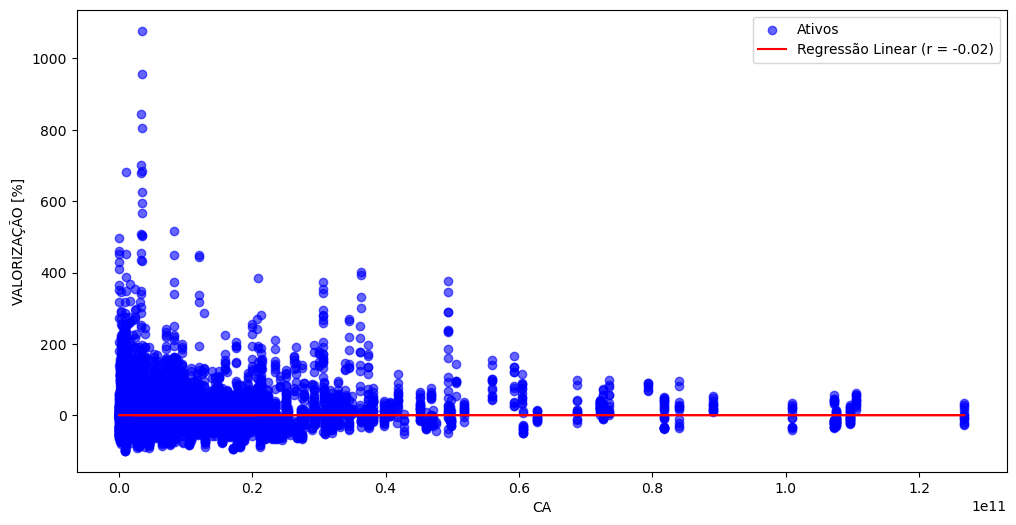

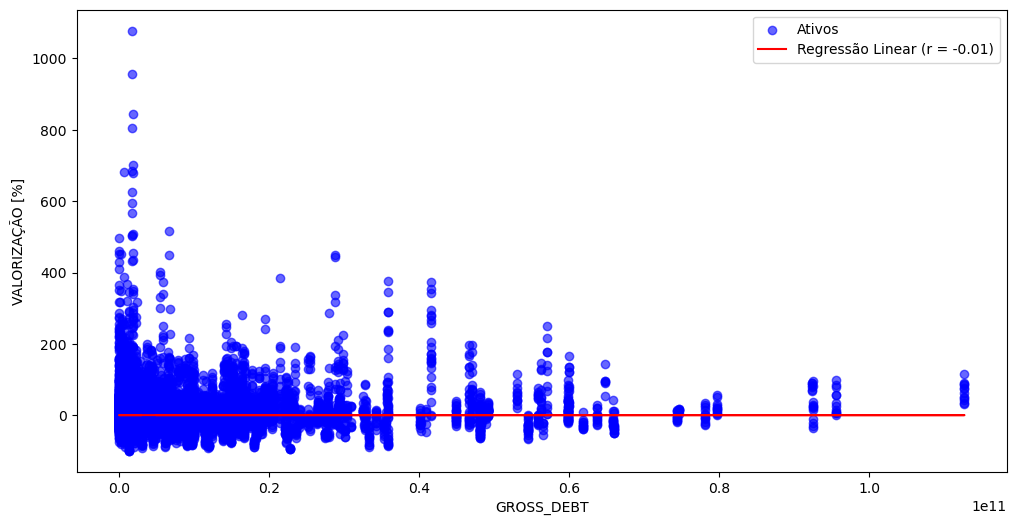

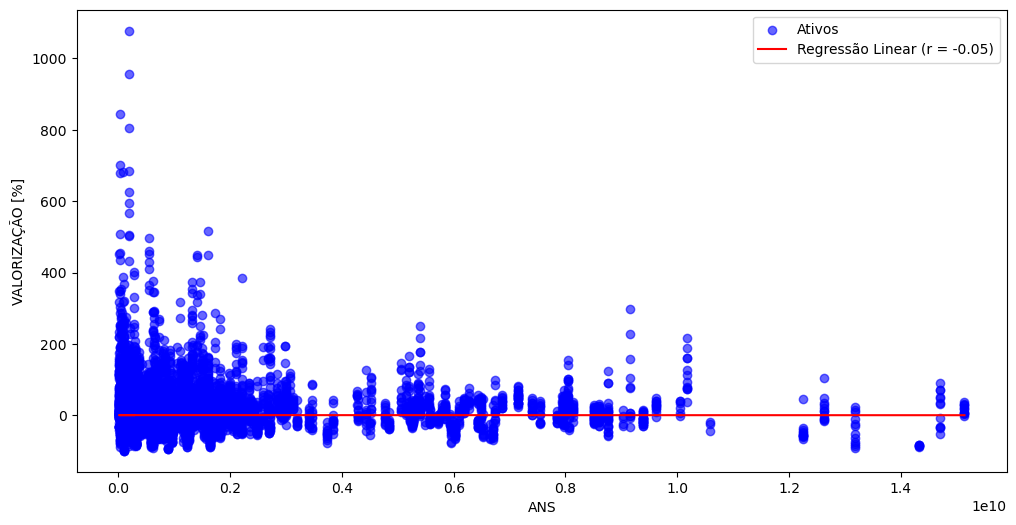

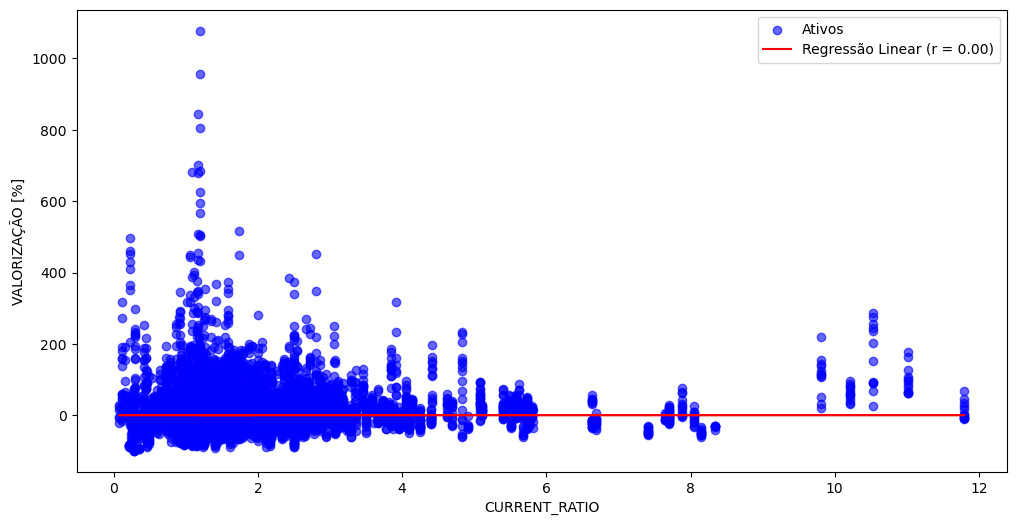

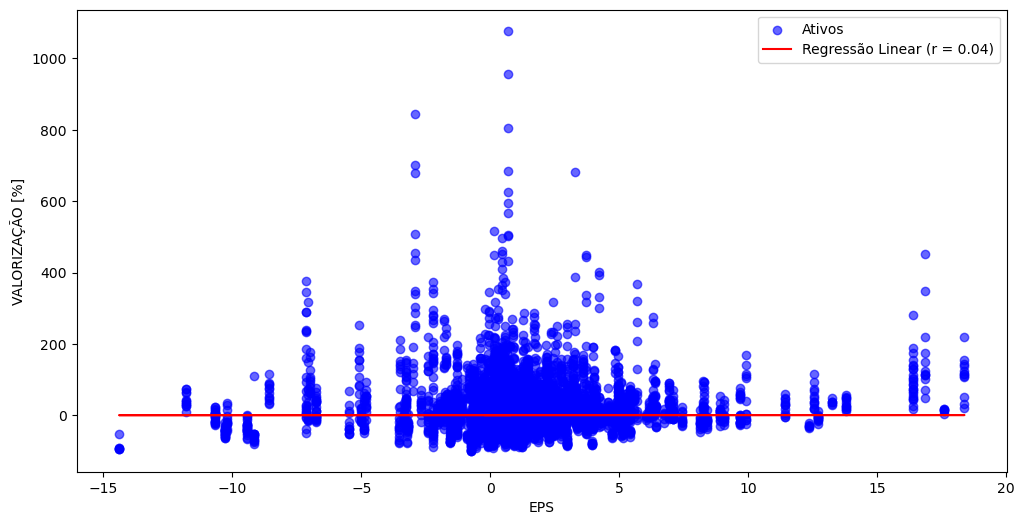

In [102]:
for feature in features:
    # Data without outliers
    plt.figure(figsize=(12, 6))
    plt.scatter(data_cleaned[feature], data_cleaned['APPRECIATION']*100, color='blue', alpha=0.6, label='Ativos')
    
    # Fit a line using linear regression
    slope, intercept, r_value, p_value, std_err = linregress(data_cleaned[feature], data_cleaned['APPRECIATION'])
    best_fit_line = slope * data_cleaned[feature] + intercept

    # Plot the best-fit line
    plt.plot(data_cleaned[feature], best_fit_line, color='red', label=f'Regressão Linear (r = {r_value:.2f})')

    # Adding labels and title
    plt.xlabel(feature)
    plt.ylabel('VALORIZAÇÃO [%]')
    plt.legend()

    # Save the figure for cleaned data
    plt.savefig(os.path.join(output_dir, f'{feature}_dispersion.png'))

In [90]:
import webbrowser

# Aplicar estilos ao DataFrame
styled_df = data_cleaned[data_cleaned['CLASS']==1].describe().style.set_table_styles(
    [
        {"selector": "thead th", "props": [("background-color", "#D3D3D3"), ("color", "black"), ("font-weight", "bold"), ("font-family", "monospace")]},
        {"selector": "tbody tr:nth-child(even)", "props": [("background-color", "#f2f2f2"), ("font-family", "monospace")]},
        {"selector": "tbody tr:nth-child(odd)", "props": [("background-color", "white"), ("font-family", "monospace")]},
    ]
).set_properties(**{"text-align": "center", "font-family": "monospace"})

# Exportar para HTML
styled_df.to_html("tabela_estilizada.html", index=False)

# Abrir no navegador
webbrowser.open("tabela_estilizada.html")

True